In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# load the dataset
data = pd.read_csv("cost-of-living.csv")

## Data preprocessing

In [149]:
data.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [150]:
# Define shortened descriptive names for columns
column_names_short = {
    'x1': 'Meal (Inexpensive Restaurant)',
    'x2': 'Meal (Mid-range Restaurant)',
    'x3': 'McMeal (McDonalds)',
    'x4': 'Domestic Beer (Restaurants)',
    'x5': 'Imported Beer (Restaurants)',
    'x6': 'Cappuccino (Restaurants)',
    'x7': 'Coke/Pepsi (Restaurants)',
    'x8': 'Water (Restaurants)',
    'x9': 'Milk (1 liter)',
    'x10': 'Bread (500g)',
    'x11': 'Rice (1kg)',
    'x12': 'Eggs (12)',
    'x13': 'Local Cheese (1kg)',
    'x14': 'Chicken Fillets (1kg)',
    'x15': 'Beef Round (1kg)',
    'x16': 'Apples (1kg)',
    'x17': 'Bananas (1kg)',
    'x18': 'Oranges (1kg)',
    'x19': 'Tomatoes (1kg)',
    'x20': 'Potatoes (1kg)',
    'x21': 'Onions (1kg)',
    'x22': 'Lettuce (1 head)',
    'x23': 'Water (1.5 liter)',
    'x24': 'Wine (Mid-Range)',
    'x25': 'Domestic Beer (0.5 liter)',
    'x26': 'Imported Beer (0.33 liter)',
    'x27': 'Cigarettes (20 Pack)',
    'x28': 'One-way Ticket (Local Transport)',
    'x29': 'Monthly Pass (Local Transport)',
    'x30': 'Taxi Start',
    'x31': 'Taxi 1km',
    'x32': 'Taxi 1hr Waiting',
    'x33': 'Gasoline (1 liter)',
    'x34': 'Volkswagen Golf (New Car)',
    'x35': 'Toyota Corolla (New Car)',
    'x36': 'Basic Utilities (85m2 Apartment)',
    'x37': 'Prepaid Mobile Tariff',
    'x38': 'Internet (60 Mbps+)',
    'x39': 'Fitness Club (Monthly Fee)',
    'x40': 'Tennis Court Rent (1 Hour)',
    'x41': 'Cinema Ticket',
    'x42': 'Preschool (Monthly Fee)',
    'x43': 'Primary School (Yearly Fee)',
    'x44': 'Jeans (Levis 501)',
    'x45': 'Summer Dress (Chain Store)',
    'x46': 'Nike Running Shoes',
    'x47': 'Leather Business Shoes',
    'x48': 'Apartment (1 br, City Centre)',
    'x49': 'Apartment (1 br, Outside Centre)',
    'x50': 'Apartment (3 br, City Centre)',
    'x51': 'Apartment (3 br, Outside Centre)',
    'x52': 'Price per Square Meter (City Centre)',
    'x53': 'Price per Square Meter (Outside Centre)',
    'x54': 'Monthly Net Salary (After Tax)',
    'x55': 'Mortgage Interest Rate (20 Years)'
}

# Rename columns with short descriptive names
data.rename(columns=column_names_short, inplace=True)

# Check the updated column names
print(data.columns)

Index(['city', 'country', 'Meal (Inexpensive Restaurant)',
       'Meal (Mid-range Restaurant)', 'McMeal (McDonalds)',
       'Domestic Beer (Restaurants)', 'Imported Beer (Restaurants)',
       'Cappuccino (Restaurants)', 'Coke/Pepsi (Restaurants)',
       'Water (Restaurants)', 'Milk (1 liter)', 'Bread (500g)', 'Rice (1kg)',
       'Eggs (12)', 'Local Cheese (1kg)', 'Chicken Fillets (1kg)',
       'Beef Round (1kg)', 'Apples (1kg)', 'Bananas (1kg)', 'Oranges (1kg)',
       'Tomatoes (1kg)', 'Potatoes (1kg)', 'Onions (1kg)', 'Lettuce (1 head)',
       'Water (1.5 liter)', 'Wine (Mid-Range)', 'Domestic Beer (0.5 liter)',
       'Imported Beer (0.33 liter)', 'Cigarettes (20 Pack)',
       'One-way Ticket (Local Transport)', 'Monthly Pass (Local Transport)',
       'Taxi Start', 'Taxi 1km', 'Taxi 1hr Waiting', 'Gasoline (1 liter)',
       'Volkswagen Golf (New Car)', 'Toyota Corolla (New Car)',
       'Basic Utilities (85m2 Apartment)', 'Prepaid Mobile Tariff',
       'Internet (60 Mbps+

In [151]:
# check the data types and missing values

print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   city                                     4956 non-null   object 
 1   country                                  4956 non-null   object 
 2   Meal (Inexpensive Restaurant)            4528 non-null   float64
 3   Meal (Mid-range Restaurant)              4505 non-null   float64
 4   McMeal (McDonalds)                       4622 non-null   float64
 5   Domestic Beer (Restaurants)              4460 non-null   float64
 6   Imported Beer (Restaurants)              4516 non-null   float64
 7   Cappuccino (Restaurants)                 4612 non-null   float64
 8   Coke/Pepsi (Restaurants)                 4511 non-null   float64
 9   Water (Restaurants)                      4640 non-null   float64
 10  Milk (1 liter)                           4578 no

In [152]:
# Drop not needed columns
data.drop(columns=['data_quality'], inplace=True)

In [153]:
print(data.columns)

Index(['city', 'country', 'Meal (Inexpensive Restaurant)',
       'Meal (Mid-range Restaurant)', 'McMeal (McDonalds)',
       'Domestic Beer (Restaurants)', 'Imported Beer (Restaurants)',
       'Cappuccino (Restaurants)', 'Coke/Pepsi (Restaurants)',
       'Water (Restaurants)', 'Milk (1 liter)', 'Bread (500g)', 'Rice (1kg)',
       'Eggs (12)', 'Local Cheese (1kg)', 'Chicken Fillets (1kg)',
       'Beef Round (1kg)', 'Apples (1kg)', 'Bananas (1kg)', 'Oranges (1kg)',
       'Tomatoes (1kg)', 'Potatoes (1kg)', 'Onions (1kg)', 'Lettuce (1 head)',
       'Water (1.5 liter)', 'Wine (Mid-Range)', 'Domestic Beer (0.5 liter)',
       'Imported Beer (0.33 liter)', 'Cigarettes (20 Pack)',
       'One-way Ticket (Local Transport)', 'Monthly Pass (Local Transport)',
       'Taxi Start', 'Taxi 1km', 'Taxi 1hr Waiting', 'Gasoline (1 liter)',
       'Volkswagen Golf (New Car)', 'Toyota Corolla (New Car)',
       'Basic Utilities (85m2 Apartment)', 'Prepaid Mobile Tariff',
       'Internet (60 Mbps+

In [154]:
# Drop rows where all values are null except for 'City' and 'Country' columns
data.dropna(subset=data.columns.difference(['City', 'Country']), how='all', inplace=True)

In [155]:
#data.dropna(inplace=True)
data.isnull().sum()

city                                          0
country                                       0
Meal (Inexpensive Restaurant)               428
Meal (Mid-range Restaurant)                 451
McMeal (McDonalds)                          334
Domestic Beer (Restaurants)                 496
Imported Beer (Restaurants)                 440
Cappuccino (Restaurants)                    344
Coke/Pepsi (Restaurants)                    445
Water (Restaurants)                         316
Milk (1 liter)                              378
Bread (500g)                                413
Rice (1kg)                                  343
Eggs (12)                                   507
Local Cheese (1kg)                          478
Chicken Fillets (1kg)                       558
Beef Round (1kg)                            566
Apples (1kg)                                372
Bananas (1kg)                               381
Oranges (1kg)                               441
Tomatoes (1kg)                          

In [156]:
data.shape[0]

4956

In [157]:
# Define categories with corresponding columns and sum them
categories = {
    'Meals': ['Meal (Inexpensive Restaurant)', 'Meal (Mid-range Restaurant)', 'McMeal (McDonalds)'],
    'Drinks': ['Domestic Beer (Restaurants)', 'Imported Beer (Restaurants)', 'Cappuccino (Restaurants)',
               'Coke/Pepsi (Restaurants)', 'Water (Restaurants)', 'Milk (1 liter)'],
    'Groceries': ['Bread (500g)', 'Rice (1kg)', 'Eggs (12)', 'Local Cheese (1kg)',
                  'Chicken Fillets (1kg)', 'Beef Round (1kg)'],
    'Fruits and Vegetables': ['Apples (1kg)', 'Bananas (1kg)', 'Oranges (1kg)', 'Tomatoes (1kg)',
                              'Potatoes (1kg)', 'Onions (1kg)', 'Lettuce (1 head)'],
    'Market Items': ['Water (1.5 liter)', 'Wine (Mid-Range)', 'Domestic Beer (0.5 liter)',
                     'Imported Beer (0.33 liter)'],
    'Cigarettes': ['Cigarettes (20 Pack)'],
    'Transport': ['One-way Ticket (Local Transport)', 'Monthly Pass (Local Transport)', 'Taxi Start',
                  'Taxi 1km', 'Taxi 1hr Waiting', 'Gasoline (1 liter)', 'Volkswagen Golf (New Car)',
                  'Toyota Corolla (New Car)'],
    'Utilities': ['Basic Utilities (85m2 Apartment)', 'Prepaid Mobile Tariff', 'Internet (60 Mbps+)'],
    'Entertainment and Education': ['Fitness Club (Monthly Fee)', 'Tennis Court Rent (1 Hour)', 'Cinema Ticket',
                                     'Preschool (Monthly Fee)', 'Primary School (Yearly Fee)'],
    'Clothing and Shoes': ['Jeans (Levis 501)', 'Summer Dress (Chain Store)', 'Nike Running Shoes',
                           'Leather Business Shoes'],
    'Housing': ['Apartment (1 br, City Centre)', 'Apartment (1 br, Outside Centre)', 'Apartment (3 br, City Centre)',
                'Apartment (3 br, Outside Centre)', 'Price per Square Meter (City Centre)', 'Price per Square Meter (Outside Centre)'],
    'Mortgage': ['Mortgage Interest Rate (20 Years)'],
    'Salary': ['Monthly Net Salary (After Tax)']
}

# Create a new DataFrame with 'city' and 'country' columns
new_data = data[['city', 'country']].copy()

# Sum columns within each category
for category, cols in categories.items():
    new_data[category] = data[cols].sum(axis=1)
################################################################

# Fill null values with the average of each category
# for category, cols in categories.items():
#     data[cols] = data[cols].fillna(data.groupby('country')[cols].transform('mean'))

# # Map columns to categories and sum them
# mapped_categories = {}
# for category, columns in categories.items():
#     for column in columns:
#         if category in mapped_categories:
#             mapped_categories[category] += data[column]
#         else:
#             mapped_categories[category] = data[column]

# Replace DataFrame columns with their corresponding categories
data = pd.DataFrame(new_data)

In [167]:
print(data.columns[:])
print(data.isnull().sum())
print(data.shape[0])

Index(['city', 'country', 'Meals', 'Drinks', 'Groceries',
       'Fruits and Vegetables', 'Market Items', 'Cigarettes', 'Transport',
       'Utilities', 'Entertainment and Education', 'Clothing and Shoes',
       'Housing', 'Mortgage', 'Salary', 'region'],
      dtype='object')
city                           0
country                        0
Meals                          0
Drinks                         0
Groceries                      0
Fruits and Vegetables          0
Market Items                   0
Cigarettes                     0
Transport                      0
Utilities                      0
Entertainment and Education    0
Clothing and Shoes             0
Housing                        0
Mortgage                       0
Salary                         0
region                         0
dtype: int64
4956


In [159]:
data.head()

,city,country,Meals,Drinks,Groceries,Fruits and Vegetables,Market Items,Cigarettes,Transport,Utilities,Entertainment and Education,Clothing and Shoes,Housing,Mortgage,Salary
0,Seoul,South Korea,67.61,16.46,74.15,32.38,20.89,3.46,57090.84,204.77,18390.51,285.79,38739.86,3.47,2689.62
1,Shanghai,China,51.24,12.99,42.38,10.29,17.79,3.56,40721.98,83.10,27849.05,317.13,33338.56,5.03,1419.87
2,Guangzhou,China,37.58,8.78,28.89,8.82,15.11,3.70,42773.29,76.33,25173.08,207.88,21101.29,5.19,1211.68
3,Mumbai,India,25.78,10.66,17.80,6.22,16.06,4.30,35080.60,52.91,3830.80,151.56,11797.33,7.96,640.81
4,Delhi,India,31.32,8.70,16.25,5.66,14.22,4.30,35237.87,66.03,2072.95,152.05,4838.79,8.06,586.46


In [190]:
num_columns = ['Meals', 'Drinks', 'Groceries', 'Fruits and Vegetables', 'Market Items',
       'Cigarettes', 'Transport', 'Utilities', 'Entertainment and Education',
       'Clothing and Shoes', 'Housing', 'Mortgage']

# Calculate average cost of living by city and country
avg_cost_by_city = data.groupby('city')[num_columns].mean()
avg_cost_by_country = data.groupby('country')[num_columns].mean()

# Identify cities and countries with the highest and lowest costs of living
highest_cost_city = avg_cost_by_city.mean(axis=1).idxmax()
lowest_cost_city = avg_cost_by_city.mean(axis=1).idxmin()
highest_cost_country = avg_cost_by_country.mean(axis=1).idxmax()
lowest_cost_country = avg_cost_by_country.mean(axis=1).idxmin()

print(f"City with the highest cost of living: {highest_cost_city}")
print(f"City with the lowest cost of living: {lowest_cost_city}")
print(f"Country with the highest cost of living: {highest_cost_country}")
print(f"Country with the lowest cost of living: {lowest_cost_country}")

results = pd.DataFrame({
    'Metric': ['Highest Cost City', 'Lowest Cost City', 'Highest Cost Country', 'Lowest Cost Country'],
    'Value': [highest_cost_city, lowest_cost_city, highest_cost_country, lowest_cost_country]
})

# Save the results to a CSV file
results.to_csv('cost_of_living_extremes.csv', index=False)

City with the highest cost of living: Honiara
City with the lowest cost of living: Alotau
Country with the highest cost of living: Solomon Islands
Country with the lowest cost of living: Comoros


In [187]:
highest_cost_city

,0


#### Another abroach implementation

In [19]:
# Select only numeric columns for mean calculation
numeric_cols = data.select_dtypes(include='number').columns

# Group by 'country' and calculate the mean for numeric columns
country_means = data.groupby('country')[numeric_cols].transform('mean')

# Fill null values in numeric columns with the mean of other cities in the same country
data[numeric_cols] = data[numeric_cols].fillna(country_means)

# Verify if there are any remaining null values
print(data.isnull().sum())

city                                        0
country                                     0
Meal (Inexpensive Restaurant)               3
Meal (Mid-range Restaurant)                 3
McMeal (McDonalds)                          4
Domestic Beer (Restaurants)                 4
Imported Beer (Restaurants)                10
Cappuccino (Restaurants)                    3
Coke/Pepsi (Restaurants)                    1
Water (Restaurants)                         1
Milk (1 liter)                              1
Bread (500g)                                1
Rice (1kg)                                  6
Eggs (12)                                   3
Local Cheese (1kg)                         13
Chicken Fillets (1kg)                       5
Beef Round (1kg)                           10
Apples (1kg)                                6
Bananas (1kg)                               5
Oranges (1kg)                               5
Tomatoes (1kg)                              6
Potatoes (1kg)                    

In [20]:
# Define the list of columns to average
columns_to_average = [
    'Meal (Inexpensive Restaurant)', 'Meal (Mid-range Restaurant)', 'McMeal (McDonalds)',
    'Domestic Beer (Restaurants)', 'Imported Beer (Restaurants)', 'Cappuccino (Restaurants)',
    'Coke/Pepsi (Restaurants)', 'Water (Restaurants)', 'Milk (1 liter)', 'Bread (500g)', 'Rice (1kg)',
    'Eggs (12)', 'Local Cheese (1kg)', 'Chicken Fillets (1kg)', 'Beef Round (1kg)', 'Apples (1kg)',
    'Bananas (1kg)', 'Oranges (1kg)', 'Tomatoes (1kg)', 'Potatoes (1kg)', 'Onions (1kg)',
    'Lettuce (1 head)', 'Water (1.5 liter)', 'Wine (Mid-Range)', 'Domestic Beer (0.5 liter)',
    'Imported Beer (0.33 liter)', 'Cigarettes (20 Pack)', 'One-way Ticket (Local Transport)',
    'Monthly Pass (Local Transport)', 'Taxi Start', 'Taxi 1km', 'Taxi 1hr Waiting',
    'Gasoline (1 liter)', 'Volkswagen Golf (New Car)', 'Toyota Corolla (New Car)',
    'Basic Utilities (85m2 Apartment)', 'Prepaid Mobile Tariff', 'Internet (60 Mbps+)',
    'Fitness Club (Monthly Fee)', 'Tennis Court Rent (1 Hour)', 'Cinema Ticket',
    'Preschool (Monthly Fee)', 'Primary School (Yearly Fee)', 'Jeans (Levis 501)',
    'Summer Dress (Chain Store)', 'Nike Running Shoes', 'Leather Business Shoes',
    'Apartment (1 br, City Centre)', 'Apartment (1 br, Outside Centre)', 'Apartment (3 br, City Centre)',
    'Apartment (3 br, Outside Centre)', 'Price per Square Meter (City Centre)', 'Price per Square Meter (Outside Centre)'
]

# Calculate average cost of living by city and country
avg_cost_by_city = data.groupby('city')[columns_to_average].mean()
avg_cost_by_country = data.groupby('country')[columns_to_average].mean()

# Identify cities and countries with the highest and lowest costs of living
highest_cost_city = avg_cost_by_city.mean(axis=1).idxmax()
lowest_cost_city = avg_cost_by_city.mean(axis=1).idxmin()
highest_cost_country = avg_cost_by_country.mean(axis=1).idxmax()
lowest_cost_country = avg_cost_by_country.mean(axis=1).idxmin()

print(f"City with the highest cost of living: {highest_cost_city}")
print(f"City with the lowest cost of living: {lowest_cost_city}")
print(f"Country with the highest cost of living: {highest_cost_country}")
print(f"Country with the lowest cost of living: {lowest_cost_country}")


City with the highest cost of living: Honiara
City with the lowest cost of living: Moroni
Country with the highest cost of living: Solomon Islands
Country with the lowest cost of living: Comoros


# (EDA) identify trends, outliers, and relationships among variables

### What are the cities and countries with the highest and lowest costs of living?

In [161]:
unique_countries = data['country'].unique()
print(data['country'].count())
print("Unique values in the 'country' column:")
print(unique_countries)

4956
Unique values in the 'country' column:
['South Korea' 'China' 'India' 'Bangladesh' 'Japan' 'Indonesia' 'Congo'
 'Thailand' 'Pakistan' 'Egypt' 'Brazil' 'Mexico' 'Nigeria' 'Russia'
 'Philippines' 'United States' 'Turkey' 'Argentina' 'United Kingdom'
 'Iran' 'France' 'Vietnam' 'Peru' 'Angola' 'Colombia' 'Malaysia'
 'Hong Kong' 'Tanzania' 'Chile' 'Saudi Arabia' 'Iraq' 'Spain' 'Sudan'
 'Kenya' 'Canada' 'Singapore' 'Myanmar' 'Ivory Coast' 'Australia'
 'South Africa' 'Morocco' 'Afghanistan' 'Jordan' 'Germany' 'Algeria'
 'Ethiopia' 'Kuwait' 'Yemen' 'Italy' 'Guatemala' 'Ukraine' 'Taiwan'
 'Ecuador' 'Bolivia' 'North Korea' 'Madagascar' 'Dominican Republic'
 'United Arab Emirates' 'Uzbekistan' 'Cameroon' 'Burkina Faso' 'Ghana'
 'Azerbaijan' 'Cuba' 'Zimbabwe' 'Cambodia' 'Somalia' 'Belarus' 'Venezuela'
 'Mali' 'Kazakhstan' 'Austria' 'Syria' 'Malawi' 'Romania' 'Belgium'
 'Poland' 'Zambia' 'Hungary' 'Uganda' 'Guinea' 'Oman' 'Mongolia' 'Serbia'
 'New Zealand' 'Czech Republic' 'Uruguay' 'Bulgaria'

In [162]:
unique_cieties = data['city'].unique()
count_cieties = data['city'].count()
print("Unique values in the 'city' column:")
print(unique_cieties)
print(count_cieties)
for city in unique_cieties:
    print(city)

Unique values in the 'city' column:
['Seoul' 'Shanghai' 'Guangzhou' ... 'Ixtapa Zihuatanejo' 'Iqaluit'
 'Neiafu']
4956
Seoul
Shanghai
Guangzhou
Mumbai
Delhi
Dhaka
Osaka
Jakarta
Shenzhen
Kinshasa
Bangkok
Karachi
Cairo
Sao Paulo
Mexico City
Lagos
Kolkata
Beijing
Moscow
Tokyo
Manila
New York
Istanbul
Buenos Aires
Bangalore
Lahore
Chennai
Chengdu
London
Wuhan
Hyderabad
Tehran
Paris
Nagoya
Ho Chi Minh City
Los Angeles
Baoding
Lima
Rio de Janeiro
Tianjin
Nanyang
Shijiazhuang
Zhengzhou
Luanda
Weifang
Linyi
Chicago
Hanoi
Chongqing
Ganzhou
Ahmedabad
Pune
Foshan
Tongshan
Heze
Changchun
Nanjing
Bogota
Kuala Lumpur
Hefei
Dongguan
Jinan
Hong Kong
Dar es Salaam
Cangzhou
Shenyang
Santiago
Xi'an
Zhanjiang
Nantong
Riyadh
Nanning
Yancheng
Hangzhou
Miami
Yantai
Luoyang
Kunming
Baghdad
Quanzhou
Madrid
Khartoum
Qingdao
Wuxi
Huanggang
Maoming
Nanchong
Dallas
Giza
Allahabad
Yulin
Changde
Philadelphia
Liaocheng
Nairobi
Guadalajara
Xiangyang
Houston
Atlanta
Nanchang
Dezhou
Suzhou
Toronto
Singapore
Rangoon
Shan

## What are the major cost components contributing to the overall cost of living in a country?

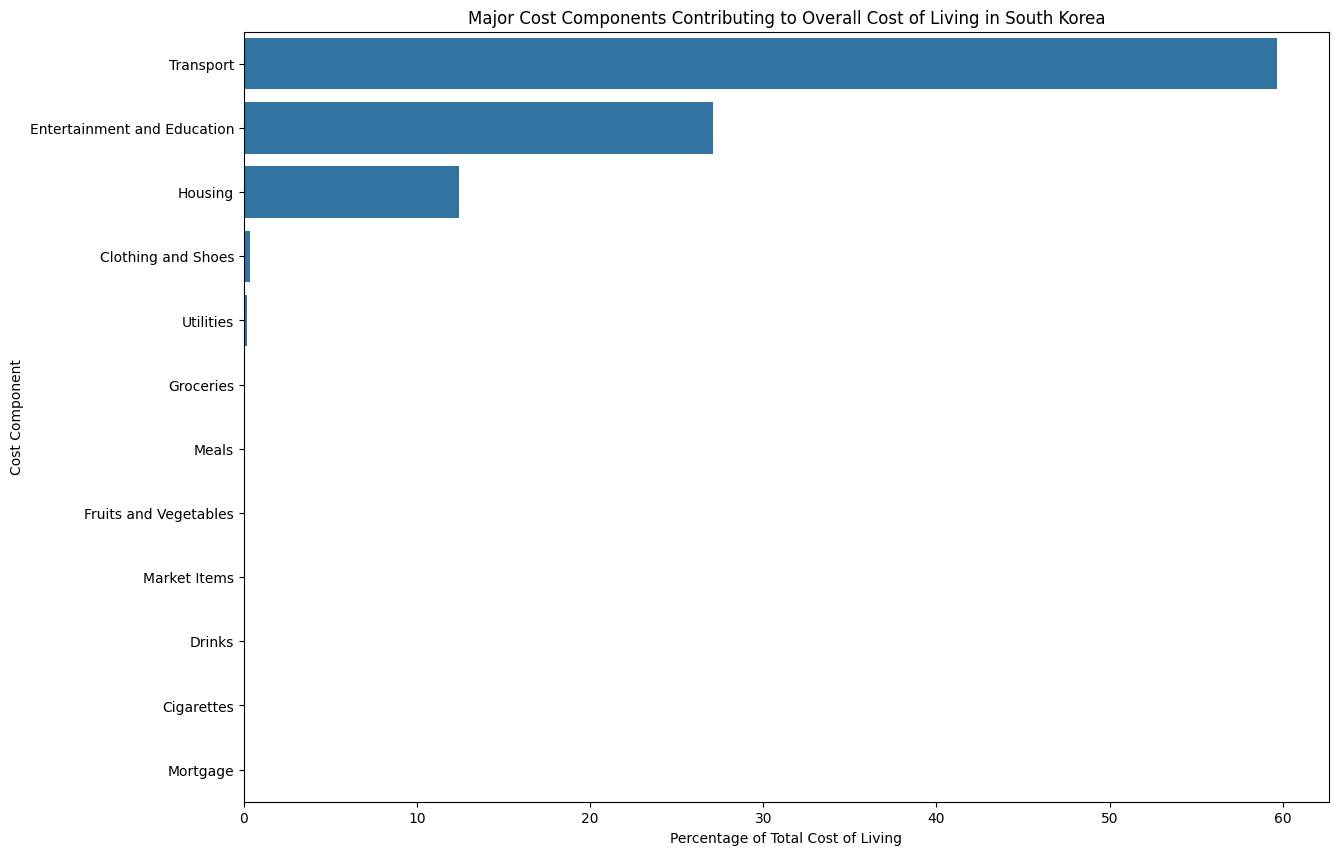

In [191]:
import pandas as pd

# Define the numerical columns
num_columns = ['Meals', 'Drinks', 'Groceries', 'Fruits and Vegetables', 'Market Items',
               'Cigarettes', 'Transport', 'Utilities', 'Entertainment and Education',
               'Clothing and Shoes', 'Housing', 'Mortgage']

# Aggregate data by country
avg_cost_by_country = data.groupby('country')[num_columns].mean().reset_index()

# Calculate the total cost of living for each country (sum of all components)
avg_cost_by_country['Total Cost of Living'] = avg_cost_by_country[num_columns].sum(axis=1)

# Calculate the proportion of each component relative to the total cost of living
proportion_df = avg_cost_by_country.copy()
for col in num_columns:
    proportion_df[col] = (avg_cost_by_country[col] / avg_cost_by_country['Total Cost of Living']) * 100

# Export avg_cost_by_country and proportion_df to CSV files for Power BI
avg_cost_by_country.to_csv('avg_cost_by_country.csv', index=False)
proportion_df.to_csv('proportion_df.csv', index=False)

# Select a country for detailed analysis (you can loop over all countries for a comprehensive analysis)
selected_country = 'South Korea'  # Replace with the country of interest
country_data = proportion_df[proportion_df['country'] == selected_country]

# Ensure country data is not empty
if country_data.empty:
    print(f"No data found for the selected country: {selected_country}")
else:
    country_data = country_data.T
    country_data.columns = ['Proportion']
    country_data = country_data.drop(['country', 'Total Cost of Living']).reset_index()
    country_data.columns = ['Cost Component', 'Proportion']

    # Sort the data by proportion
    country_data = country_data.sort_values(by='Proportion', ascending=False)

    # Export country_data to a CSV file for Power BI
    country_data.to_csv(f'{selected_country}_cost_components.csv', index=False)

    # Visualize the major cost components
    plt.figure(figsize=(14, 10))
    sns.barplot(x='Proportion', y='Cost Component', data=country_data)
    plt.xlabel('Percentage of Total Cost of Living')
    plt.ylabel('Cost Component')
    plt.title(f'Major Cost Components Contributing to Overall Cost of Living in {selected_country}')
    plt.show()


In [175]:
data['Total Cost of Living'] = avg_cost_by_country['Total Cost of Living']
data.head()

,city,country,Meals,Drinks,Groceries,Fruits and Vegetables,Market Items,Cigarettes,Transport,Utilities,Entertainment and Education,Clothing and Shoes,Housing,Mortgage,Salary,region,Total Cost of Living
0,Seoul,South Korea,67.61,16.46,74.15,32.38,20.89,3.46,57090.84,204.77,18390.51,285.79,38739.86,3.47,2689.62,Asia,19278.103333
1,Shanghai,China,51.24,12.99,42.38,10.29,17.79,3.56,40721.98,83.10,27849.05,317.13,33338.56,5.03,1419.87,Asia,30643.274000
2,Guangzhou,China,37.58,8.78,28.89,8.82,15.11,3.70,42773.29,76.33,25173.08,207.88,21101.29,5.19,1211.68,Asia,41814.766176
3,Mumbai,India,25.78,10.66,17.80,6.22,16.06,4.30,35080.60,52.91,3830.80,151.56,11797.33,7.96,640.81,Asia,269.270000
4,Delhi,India,31.32,8.70,16.25,5.66,14.22,4.30,35237.87,66.03,2072.95,152.05,4838.79,8.06,586.46,Asia,23153.266667


## What are the major cost components contributing to the overall cost of living in a region?

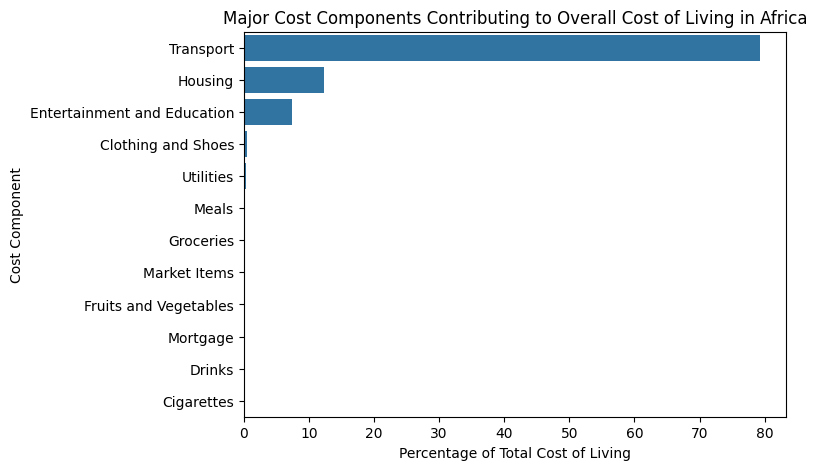

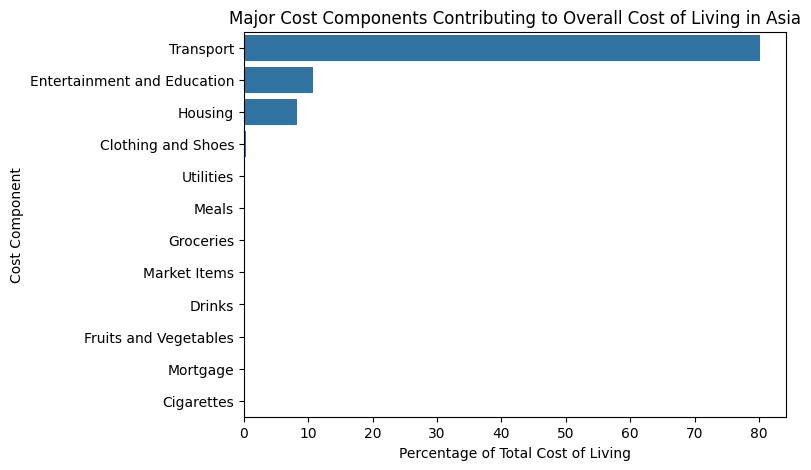

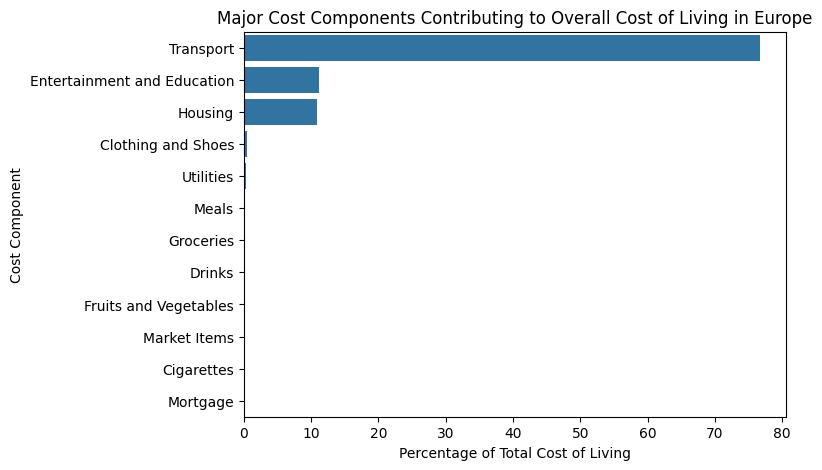

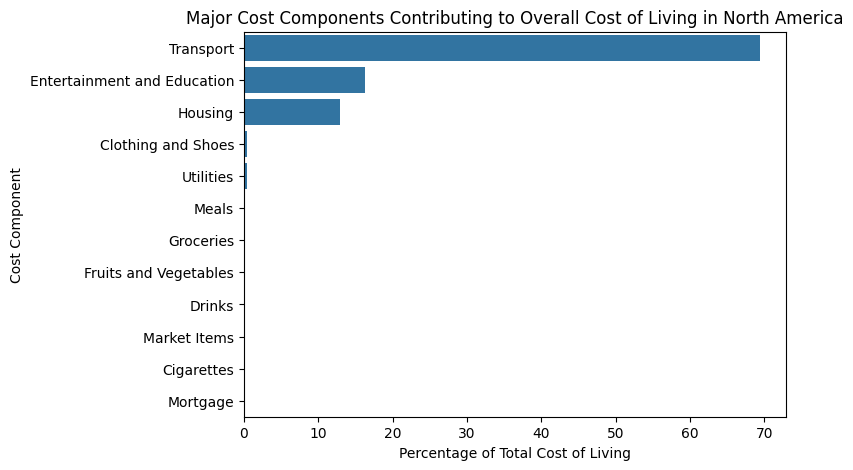

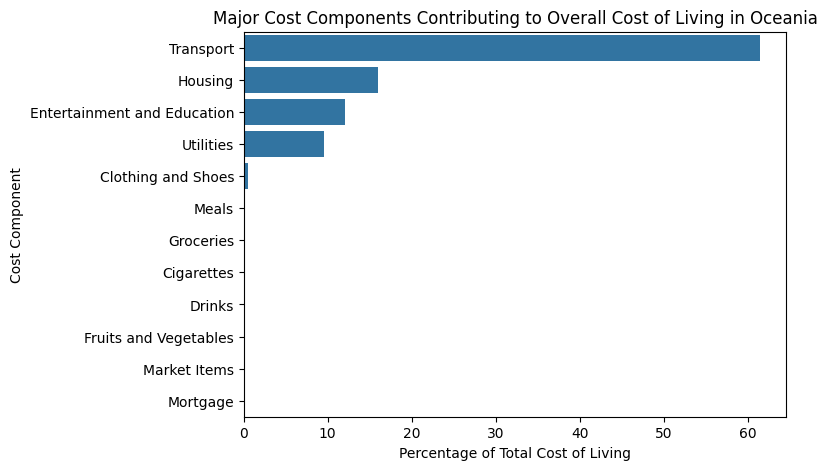

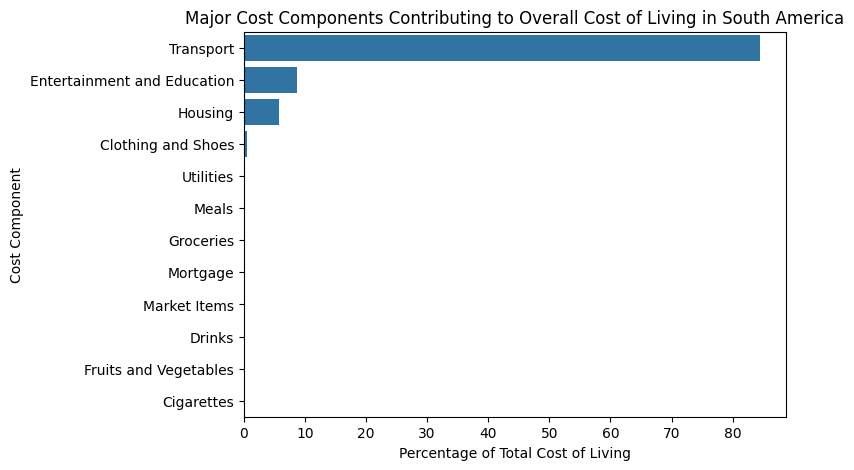

In [192]:
# Ensure you have a 'region' column in your DataFrame
# For example, create a dictionary to map countries to regions
country_to_region = {
    'South Korea': 'Asia', 'China': 'Asia', 'India': 'Asia', 'Bangladesh': 'Asia',
    'Japan': 'Asia', 'Indonesia': 'Asia', 'Congo': 'Africa', 'Thailand': 'Asia',
    'Pakistan': 'Asia', 'Egypt': 'Africa', 'Brazil': 'South America', 'Mexico': 'North America',
    'Nigeria': 'Africa', 'Russia': 'Europe', 'Philippines': 'Asia', 'United States': 'North America',
    'Turkey': 'Europe', 'Argentina': 'South America', 'United Kingdom': 'Europe',
    'Iran': 'Asia', 'France': 'Europe', 'Vietnam': 'Asia', 'Peru': 'South America',
    'Angola': 'Africa', 'Colombia': 'South America', 'Malaysia': 'Asia',
    'Hong Kong': 'Asia', 'Tanzania': 'Africa', 'Chile': 'South America', 'Saudi Arabia': 'Asia',
    'Iraq': 'Asia', 'Spain': 'Europe', 'Sudan': 'Africa', 'Kenya': 'Africa',
    'Canada': 'North America', 'Singapore': 'Asia', 'Myanmar': 'Asia', 'Ivory Coast': 'Africa',
    'Australia': 'Oceania', 'South Africa': 'Africa', 'Morocco': 'Africa',
    'Afghanistan': 'Asia', 'Jordan': 'Asia', 'Germany': 'Europe', 'Algeria': 'Africa',
    'Ethiopia': 'Africa', 'Kuwait': 'Asia', 'Yemen': 'Asia', 'Italy': 'Europe',
    'Guatemala': 'North America', 'Ukraine': 'Europe', 'Taiwan': 'Asia', 'Ecuador': 'South America',
    'Bolivia': 'South America', 'North Korea': 'Asia', 'Madagascar': 'Africa',
    'Dominican Republic': 'North America', 'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia',
    'Cameroon': 'Africa', 'Burkina Faso': 'Africa', 'Ghana': 'Africa',
    'Azerbaijan': 'Asia', 'Cuba': 'North America', 'Zimbabwe': 'Africa',
    'Cambodia': 'Asia', 'Somalia': 'Africa', 'Belarus': 'Europe', 'Venezuela': 'South America',
    'Mali': 'Africa', 'Kazakhstan': 'Asia', 'Austria': 'Europe', 'Syria': 'Asia',
    'Malawi': 'Africa', 'Romania': 'Europe', 'Belgium': 'Europe', 'Poland': 'Europe',
    'Zambia': 'Africa', 'Hungary': 'Europe', 'Uganda': 'Africa', 'Guinea': 'Africa',
    'Oman': 'Asia', 'Mongolia': 'Asia', 'Serbia': 'Europe', 'New Zealand': 'Oceania',
    'Czech Republic': 'Europe', 'Uruguay': 'South America', 'Bulgaria': 'Europe',
    'Honduras': 'North America', 'Mozambique': 'Africa', 'Qatar': 'Asia', 'Senegal': 'Africa',
    'Rwanda': 'Africa', 'Libya': 'Africa', 'Georgia': 'Asia', 'Denmark': 'Europe',
    'Chad': 'Africa', 'Armenia': 'Asia', 'Kyrgyzstan': 'Asia', 'Mauritania': 'Africa',
    'Tunisia': 'Africa', 'Nepal': 'Asia', 'Nicaragua': 'North America', 'Niger': 'Africa',
    'Liberia': 'Africa', 'Haiti': 'North America', 'Sweden': 'Europe', 'Israel': 'Asia',
    'Laos': 'Asia', 'Croatia': 'Europe', 'Sri Lanka': 'Asia', 'Tajikistan': 'Asia',
    'Netherlands': 'Europe', 'Eritrea': 'Africa', 'Sierra Leone': 'Africa', 'Togo': 'Africa',
    'Gabon': 'Africa', 'Finland': 'Europe', 'Panama': 'North America', 'Greece': 'Europe',
    'Norway': 'Europe', 'Benin': 'Africa', 'North Macedonia': 'Europe', 'Moldova': 'Europe',
    'Burundi': 'Africa', 'Latvia': 'Europe', 'Jamaica': 'North America', 'Lithuania': 'Europe',
    'Ireland': 'Europe', 'Estonia': 'Europe', 'Paraguay': 'South America', 'Portugal': 'Europe',
    'Lebanon': 'Asia', 'Djibouti': 'Africa', 'Albania': 'Europe', 'Slovakia': 'Europe',
    'Guinea-Bissau': 'Africa', 'Lesotho': 'Africa', 'Namibia': 'Africa', 'Cyprus': 'Europe',
    'South Sudan': 'Africa', 'Bahamas': 'North America', 'Slovenia': 'Europe',
    'Bosnia And Herzegovina': 'Europe', 'Timor-Leste': 'Asia', 'Maldives': 'Asia',
    'Suriname': 'South America', 'Botswana': 'Africa', 'Gibraltar': 'Europe',
    'Papua New Guinea': 'Oceania', 'Guyana': 'South America', 'Montenegro': 'Europe',
    'Martinique': 'North America', 'Bahrain': 'Asia', 'Curacao': 'North America',
    'Switzerland': 'Europe', 'Reunion': 'Africa', 'Equatorial Guinea': 'Africa',
    'French Polynesia': 'Oceania', 'Luxembourg': 'Europe', 'Barbados': 'North America',
    'Iceland': 'Europe', 'Fiji': 'Oceania', 'New Caledonia': 'Oceania', 'Cape Verde': 'Africa',
    'Comoros': 'Africa', 'Solomon Islands': 'Oceania', 'Monaco': 'Europe', 'Bhutan': 'Asia',
    'Swaziland': 'Africa', 'French Guiana': 'South America', 'Sao Tome And Principe': 'Africa',
    'Saint Lucia': 'North America', 'Vanuatu': 'Oceania', 'Bermuda': 'North America',
    'Brunei': 'Asia', 'Isle Of Man': 'Europe', 'Aruba': 'North America', 'Samoa': 'Oceania',
    'Trinidad And Tobago': 'North America', 'Jersey': 'Europe', 'Gambia': 'Africa',
    'Greenland': 'North America', 'Turkmenistan': 'Asia', 'Marshall Islands': 'Oceania',
    'Belize': 'North America', 'Saint Kitts And Nevis': 'North America',
    'Saint Vincent And The Grenadines': 'North America', 'Seychelles': 'Africa',
    'Malta': 'Europe', 'Faroe Islands': 'Europe', 'Tonga': 'Oceania', 'Antigua And Barbuda': 'North America',
    'Andorra': 'Europe', 'Dominica': 'North America', 'American Samoa': 'Oceania',
    'Turks And Caicos Islands': 'North America', 'Tuvalu': 'Oceania', 'Liechtenstein': 'Europe',
    'Cook Islands': 'Oceania', 'San Marino': 'Europe', 'Montserrat': 'North America',
    'Kosovo (Disputed Territory)': 'Europe', 'Vatican City': 'Europe', 'Falkland Islands': 'South America',
    'Saint Helena': 'Africa', 'Sint Maarten': 'North America', 'Nauru': 'Oceania',
    'British Virgin Islands': 'North America', 'Anguilla': 'North America', 'Mauritius': 'Africa',
    'Puerto Rico': 'North America', 'Guadeloupe': 'North America', 'El Salvador': 'North America',
    'Costa Rica': 'North America'
}

# Add the 'region' column to your DataFrame
data['region'] = data['country'].map(country_to_region)

# Aggregate data by region
avg_cost_by_region = data.groupby('region')[num_columns].mean().reset_index()

# Calculate the total cost of living for each region (sum of all components)
avg_cost_by_region['Total Cost of Living'] = avg_cost_by_region[num_columns].sum(axis=1)

# Calculate the proportion of each component relative to the total cost of living
proportion_df = avg_cost_by_region.copy()
for col in num_columns:
    proportion_df[col] = (avg_cost_by_region[col] / avg_cost_by_region['Total Cost of Living']) * 100

# Select a region for detailed analysis (you can loop over all regions for a comprehensive analysis)
regions = proportion_df['region'].unique()
for region in regions:
    selected_region = region  # Replace with the region of interest
    region_data = proportion_df[proportion_df['region'] == selected_region]

    # Ensure region data is not empty
    if region_data.empty:
        print(f"No data found for the selected region: {selected_region}")
    else:
        region_data = region_data.T
        region_data.columns = ['Proportion']
        region_data = region_data.drop(['region', 'Total Cost of Living']).reset_index()
        region_data.columns = ['Cost Component', 'Proportion']

        # Sort the data by proportion
        region_data = region_data.sort_values(by='Proportion', ascending=False)

        # Export region_data to a CSV file for Power BI
        region_data.to_csv(f'{selected_region}_cost_components.csv', index=False)

        # Visualize the major cost components
        plt.figure(figsize=(7, 5))
        sns.barplot(x='Proportion', y='Cost Component', data=region_data)
        plt.xlabel('Percentage of Total Cost of Living')
        plt.ylabel('Cost Component')
        plt.title(f'Major Cost Components Contributing to Overall Cost of Living in {selected_region}')
        plt.show()

### How do factors like average salary, housing costs, and transportation expenses correlate with the cost of living?

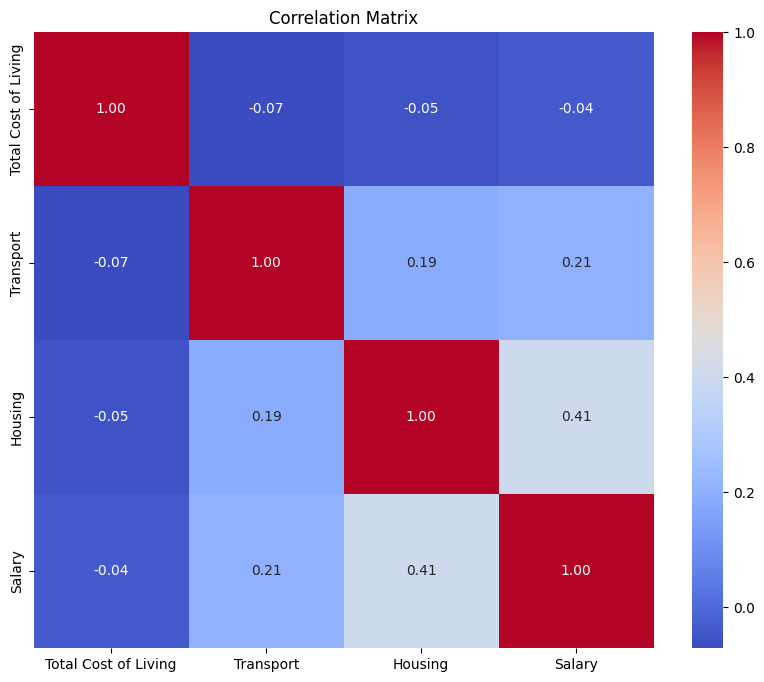

In [193]:
# Define the relevant columns for correlation analysis
columns_of_interest = ['Total Cost of Living', 'Transport', 'Housing', 'Salary']

# Subsetting the DataFrame
subset_data = data[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

# Export the correlation matrix to a CSV file for Power BI
correlation_matrix.to_csv('correlation_matrix.csv', index=True)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

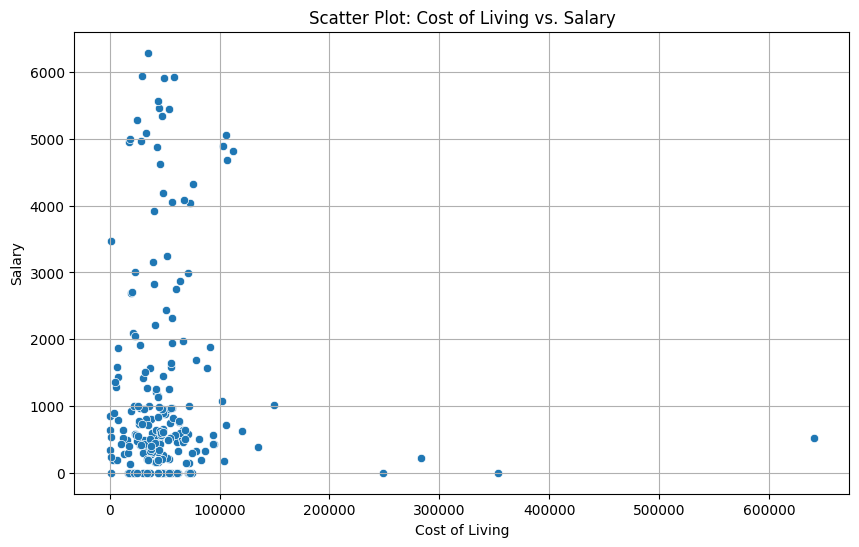

In [194]:
# Ensure 'Total Cost of Living' and 'Salary' columns are present in the data
scatter_data = data[['Total Cost of Living', 'Salary']]

# Export the data for the scatter plot to a CSV file for Power BI
scatter_data.to_csv('scatter_data.csv', index=False)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cost of Living', y='Salary', data=scatter_data)
plt.title('Scatter Plot: Cost of Living vs. Salary')
plt.xlabel('Cost of Living')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [181]:
#we can remove outliares here but we will skip this right now

### Are there any trends or patterns in the data that can help individuals and organizations make strategic decisions?